In [1]:
!pip install librosa matplotlib mutagen pandas torch

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.utils.rnn import pad_sequence, pack_padded_sequence, pad_packed_sequence
from sklearn.model_selection import train_test_split

In [2]:
import os
import librosa

train_folder = 'train'
for f in os.listdir(train_folder):
    if f.endswith('.wav'):
        path = os.path.join(train_folder, f)
        y, sr = librosa.load(path, sr=None)  # Load with original sample rate
        if sr != 16000:
            print(f"{f} has sample rate {sr}")

# Nothings gets printed, so all files are 16000 Hz

In [3]:
import os
import librosa

train_folder = 'train'
train_wav_files = [f for f in os.listdir(train_folder) if f.endswith('.wav')]
print(f"Number of .wav files in train folder: {len(train_wav_files)}")

total_duration = 0
for f in train_wav_files:
    y, sr = librosa.load(os.path.join(train_folder, f), sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    total_duration += duration

avg_duration = total_duration / len(train_wav_files)
print(f"Average duration: {avg_duration:.2f} seconds")

speaker_ids = {filename.split('_')[0] for filename in train_wav_files}
male_speakers = [s for s in speaker_ids if s.endswith('m')]
female_speakers = [s for s in speaker_ids if s.endswith('f')]

print(f"Total unique speakers: {len(speaker_ids)}")
print(f"Male speakers: {len(male_speakers)}")
print(f"Female speakers: {len(female_speakers)}")
print("\nMale speaker IDs:", sorted(male_speakers))
print("Female speaker IDs:", sorted(female_speakers))


Number of .wav files in train folder: 3166
Average duration: 5.26 seconds
Total unique speakers: 10
Male speakers: 5
Female speakers: 5

Male speaker IDs: ['1m', '2m', '3m', '4m', '5m']
Female speaker IDs: ['1f', '2f', '3f', '4f', '5f']


Minimum duration: 1.67 seconds
Maximum duration: 12.97 seconds
Standard deviation: 1.74 seconds


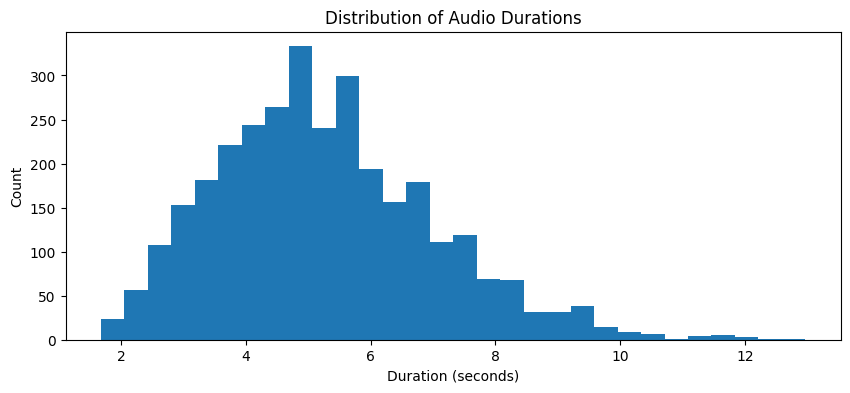

In [4]:
durations = []
for f in train_wav_files:
    y, sr = librosa.load(os.path.join(train_folder, f), sr=None)
    duration = librosa.get_duration(y=y, sr=sr)
    durations.append(duration)

min_duration = min(durations)
max_duration = max(durations)
std_duration = np.std(durations)

print(f"Minimum duration: {min_duration:.2f} seconds")
print(f"Maximum duration: {max_duration:.2f} seconds")
print(f"Standard deviation: {std_duration:.2f} seconds")

plt.figure(figsize=(10, 4))
plt.hist(durations, bins=30)
plt.title('Distribution of Audio Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.show()


In [ ]:
import wave  # Import the wave module for WAV file handling
with wave.open('Test set/3599.wav', 'rb') as wav:  # Open WAV file in read-binary mode
    print(f"Channels: {wav.getnchannels()}")  # Print number of audio channels
    print(f"Sample width: {wav.getsampwidth()}")  # Print sample width in bytes - This shows how many bytes are used to store each audio sample (e.g., 2 bytes = 16-bit audio)
    print(f"Frame rate: {wav.getframerate()}")  # Print sampling frequency
    print(f"Frames: {wav.getnframes()}")  # Print total number of frames
    print(f"Parameters: {wav.getparams()}")  # Print all WAV file parameters



# The accent is encoded in the first character of the file name with a single number from 1 to 5. The gender is encoded as a single letter (’m’ or ’f’) corresponding to the second character of the file name.". 

In [ ]:
from mutagen.wave import WAVE

audio = WAVE('Test set/3599.wav')
print(audio.tags)  # print None if there are no tags

In [ ]:
# Create a list to store our dataset information
dataset_manifest = []

for file_path in train_wav_files:
    # Extract filename without extension
    filename = os.path.basename(file_path).split('.')[0]
    
    # Extract accent (first character) and convert to 0-based index
    accent = int(filename[0]) - 1  # Convert 1-5 to 0-4
    
    # Extract gender (second character)
    gender = filename[1]
    
    # Create dictionary with file information
    file_info = {
        'file_path': file_path,
        'accent': accent,
        'gender': gender
    }
    
    dataset_manifest.append(file_info)

# Convert to DataFrame for easier manipulation
df_manifest = pd.DataFrame(dataset_manifest)

# Display first few rows and basic statistics
print("Dataset Manifest Preview:")
print(df_manifest.head())
print("\nDataset Statistics:")
print(f"Total files: {len(df_manifest)}")
print("\nAccent distribution:")
print(df_manifest['accent'].value_counts().sort_index())
print("\nGender distribution:")
print(df_manifest['gender'].value_counts())
